In [179]:
import pandas as pd
import os
import geopandas as gpd
import math
%matplotlib inline

In [2]:
notebook_path = os.getcwd() + '/' + os.path.basename(os.getcwd())
notebook_path
cands_path = os.path.join(os.path.dirname(notebook_path), "tmp/candidates.csv")
votes_path = os.path.join(os.path.dirname(notebook_path), "tmp/votes.csv")
cands = pd.read_csv(cands_path, sep=';')
votes = pd.read_csv(votes_path, sep=';')

In [3]:
import numpy as np

# Counting numbers of votes.
## TotalVotes - sum of all votes which turns out to be equal to all valid ballots turned in

In [4]:
TotalVotes = np.sum(cands.iloc[0,1:])

In [60]:
m_map = gpd.GeoDataFrame.from_file("geomap/mo.shp", encoding='utf-8')
m_map

,NAME,OKATO,OKTMO,NAME_AO,OKATO_AO,ABBREV_AO,TYPE_MO,geometry
0,Киевский,45298555,45945000,Троицкий,45298000,Троицкий,Поселение,"(POLYGON ((36.8031012 55.4408329, 36.8031903 5..."
1,Филёвский Парк,45268595,45328000,Западный,45268000,ЗАО,Муниципальный округ,"POLYGON ((37.4276499 55.7482092, 37.4284863 55..."
2,Новофёдоровское,45298567,45954000,Троицкий,45298000,Троицкий,Поселение,"POLYGON ((36.8035692 55.4516224, 36.8045117 55..."
3,Роговское,45298575,45956000,Троицкий,45298000,Троицкий,Поселение,"POLYGON ((36.9372397 55.2413907, 36.9372604 55..."
4,"""Мосрентген""",45297568,45953000,Новомосковский,45297000,Новомосковский,Поселение,"POLYGON ((37.4395575 55.6273129, 37.4401803 55..."
...,...,...,...,...,...,...,...,...
141,Ивановское,45263567,45306000,Восточный,45263000,ВАО,Муниципальный округ,"POLYGON ((37.7998089 55.7623198, 37.7998143 55..."
142,Косино-Ухтомский,45263573,45308000,Восточный,45263000,ВАО,Муниципальный округ,"POLYGON ((37.8360239 55.709776, 37.8361995 55...."
143,Новокосино,45263579,45310000,Восточный,45263000,ВАО,Муниципальный округ,"POLYGON ((37.8404157 55.7304867, 37.8406349 55..."
144,Некрасовка,45290574,45391000,Юго-Восточный,45290000,ЮВАО,Муниципальный округ,"POLYGON ((37.9061276 55.7062585, 37.9070118 55..."


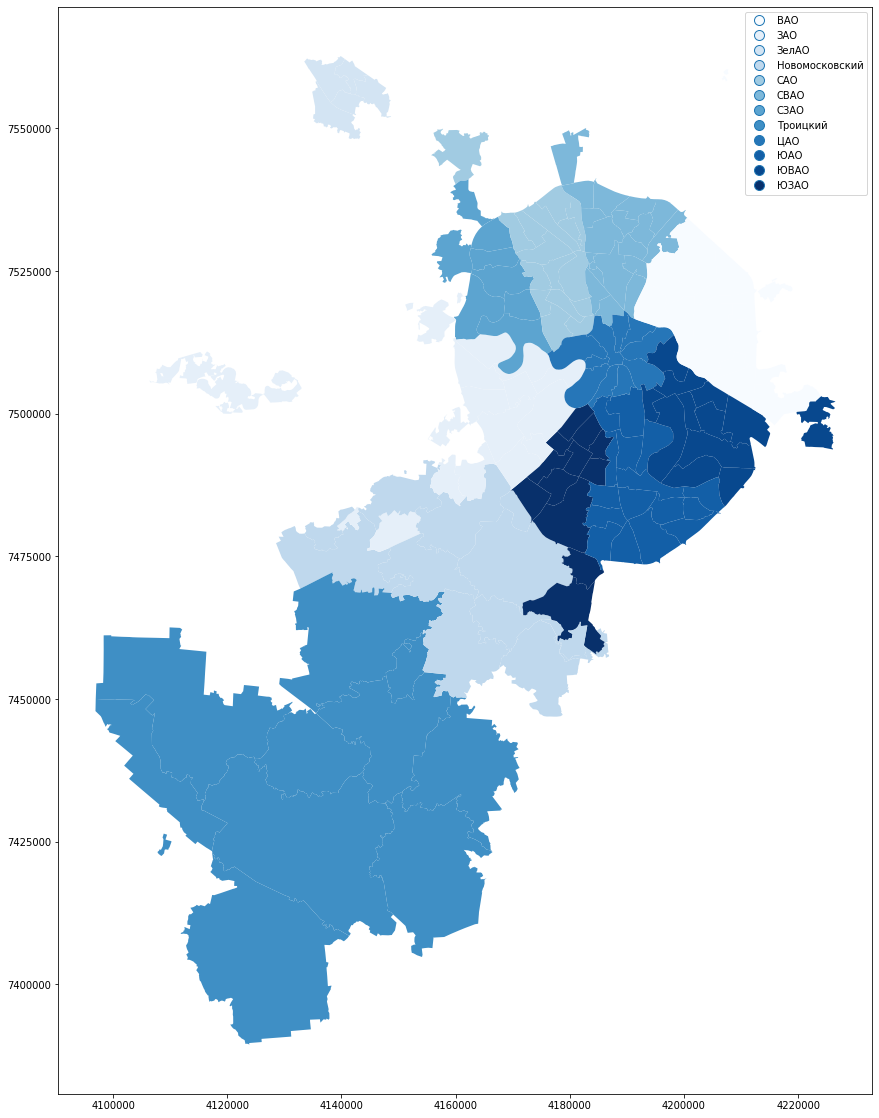

In [61]:
m_map_wm = m_map.to_crs({'init' :'epsg:3857'})
m_map_wm.plot(column = 'ABBREV_AO', linewidth=0.5, cmap='Blues', legend=True, figsize=[20,20], )

In [84]:
frames = [votes, cands]
full_votes = pd.concat(frames, axis=1)
full_votes['District'] = full_votes['District'].str.replace('ё', 'е')
m_map['NAME'] = m_map['NAME'].str.replace('ё', 'е')
m_map['NAME'] = m_map['NAME'].str.lower()
full_votes['District'] = full_votes['District'].str.lower()
full_votes

,Unnamed: 0,"Число избирателей, внесенных в список","Число бюллетеней, полученных УИК","Число бюллетеней, выданных в помещении для голосования","Число бюллетеней, выданных вне помещения для голосования",Число погашенных бюллетеней,"Число бюллетеней, содержащихся в переносных ящиках","Число бюллетеней, содержащихся в стационарных ящиках",Число недействительных бюллетеней,Число действительных бюллетеней,Число утраченных бюллетеней,"Число бюллетеней, не учтенных при получении",District,Unnamed: 0,Балакин Михаил Дмитриевич,Дегтярев Михаил Владимирович,Кумин Вадим Валентинович,Свиридов Илья Тимурович,Собянин Сергей Семенович
0,0,7301064,5718568,2109453,149627,3459473,149535,2106162,64278,2191419,31,16,total,0,42192,151642,256717,158106,1582762
1,1,62663,48000,18092,1034,28873,1034,18059,607,18486,1,0,район богородское,1,383,1317,2260,1532,12994
2,2,76911,61150,23264,2239,35647,2239,23183,771,24651,0,0,район вешняки,2,508,1877,3162,1787,17317
3,3,40553,30500,12055,1616,16829,1616,12031,472,13175,0,0,район восточное измайлово,3,306,1068,1804,1076,8921
4,4,100703,75200,25844,2136,47220,2136,25823,850,27109,0,0,район гольяново,4,527,2339,3513,2258,18472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,124,64687,51429,19045,1361,31023,1361,19033,526,19868,0,0,район чертаново центральное,124,402,1340,2095,1361,14670
125,125,92388,69885,25933,1747,42205,1747,25892,644,26995,0,0,район чертаново южное,125,540,1972,2545,1729,20209
126,126,93986,69070,35016,828,33220,828,34943,915,34856,6,0,новомосковская,126,540,1559,2367,1144,29246
127,127,100254,87545,39476,2660,45409,2660,39472,992,41140,0,0,троицкий административный округ,127,588,2040,3003,1292,34217


In [86]:
full_votes['District'] = full_votes['District'].str.replace('район ', '')
full_votes['District'] = full_votes['District'].str.replace(' район', '')
full_votes['District'] = full_votes['District'].str.rstrip()
full_votes = full_votes.drop(['Unnamed: 0', 'Число бюллетеней, не учтенных при получении', 'Число утраченных бюллетеней', 'Число недействительных бюллетеней', 'Число бюллетеней, выданных в помещении для голосования', 'Число бюллетеней, выданных вне помещения для голосования', 'Число бюллетеней, содержащихся в переносных ящиках', 'Число бюллетеней, содержащихся в стационарных ящиках', 'Число утраченных бюллетеней', 'Число бюллетеней, не учтенных при получении'], axis=1)
full_votes

,"Число избирателей, внесенных в список","Число бюллетеней, полученных УИК",Число погашенных бюллетеней,Число действительных бюллетеней,District,Балакин Михаил Дмитриевич,Дегтярев Михаил Владимирович,Кумин Вадим Валентинович,Свиридов Илья Тимурович,Собянин Сергей Семенович
0,7301064,5718568,3459473,2191419,total,42192,151642,256717,158106,1582762
1,62663,48000,28873,18486,богородское,383,1317,2260,1532,12994
2,76911,61150,35647,24651,вешняки,508,1877,3162,1787,17317
3,40553,30500,16829,13175,восточное измайлово,306,1068,1804,1076,8921
4,100703,75200,47220,27109,гольяново,527,2339,3513,2258,18472
...,...,...,...,...,...,...,...,...,...,...
124,64687,51429,31023,19868,чертаново центральное,402,1340,2095,1361,14670
125,92388,69885,42205,26995,чертаново южное,540,1972,2545,1729,20209
126,93986,69070,33220,34856,новомосковская,540,1559,2367,1144,29246
127,100254,87545,45409,41140,троицкий административный округ,588,2040,3003,1292,34217


# Finding the difference, map check

In [99]:
dis1 = set(m_map['NAME'])
dis2 = set(full_votes['District'])
diff = dis2.difference(dis1)
diff.discard('total')
dis_diff = list(diff)
dis_diff
dis_diff_2 = dis1.difference(dis2)
dis2.discard('total')
dis_diff_2

{'"мосрентген"',
 'внуковское',
 'вороновское',
 'воскресенское',
 'десеновское',
 'киевский',
 'кленовское',
 'кокошкино',
 'краснопахорское',
 'марушкинское',
 'михайлово-ярцевское',
 'московский',
 'новофедоровское',
 'первомайское',
 'роговское',
 'рязановское',
 'троицк',
 'филимонковское',
 'щаповское',
 'щербинка'}

In [97]:
full_votes = full_votes[full_votes.District != 'новомосковская']
full_votes = full_votes[full_votes.District != 'троицкий административный округ']
full_votes

,"Число избирателей, внесенных в список","Число бюллетеней, полученных УИК",Число погашенных бюллетеней,Число действительных бюллетеней,District,Балакин Михаил Дмитриевич,Дегтярев Михаил Владимирович,Кумин Вадим Валентинович,Свиридов Илья Тимурович,Собянин Сергей Семенович
0,7301064,5718568,3459473,2191419,total,42192,151642,256717,158106,1582762
1,62663,48000,28873,18486,богородское,383,1317,2260,1532,12994
2,76911,61150,35647,24651,вешняки,508,1877,3162,1787,17317
3,40553,30500,16829,13175,восточное измайлово,306,1068,1804,1076,8921
4,100703,75200,47220,27109,гольяново,527,2339,3513,2258,18472
...,...,...,...,...,...,...,...,...,...,...
122,68210,58970,38433,19914,царицыно,415,1463,2090,1242,14704
123,60867,45100,27812,16715,чертаново северное,285,1118,1815,1205,12292
124,64687,51429,31023,19868,чертаново центральное,402,1340,2095,1361,14670
125,92388,69885,42205,26995,чертаново южное,540,1972,2545,1729,20209


In [105]:
for name in dis_diff_2:
    m_map = m_map[m_map.NAME != name]
full_votes = full_votes[full_votes.District != 'внуковское']

In [116]:
total_data = full_votes.iloc[0]
full_votes = full_votes[full_votes.District != 'total']
full_votes

,"Число избирателей, внесенных в список","Число бюллетеней, полученных УИК",Число погашенных бюллетеней,Число действительных бюллетеней,District,Балакин Михаил Дмитриевич,Дегтярев Михаил Владимирович,Кумин Вадим Валентинович,Свиридов Илья Тимурович,Собянин Сергей Семенович
1,62663,48000,28873,18486,богородское,383,1317,2260,1532,12994
2,76911,61150,35647,24651,вешняки,508,1877,3162,1787,17317
3,40553,30500,16829,13175,восточное измайлово,306,1068,1804,1076,8921
4,100703,75200,47220,27109,гольяново,527,2339,3513,2258,18472
5,79206,61500,36652,24114,ивановское,479,1920,2941,1817,16957
...,...,...,...,...,...,...,...,...,...,...
122,68210,58970,38433,19914,царицыно,415,1463,2090,1242,14704
123,60867,45100,27812,16715,чертаново северное,285,1118,1815,1205,12292
124,64687,51429,31023,19868,чертаново центральное,402,1340,2095,1361,14670
125,92388,69885,42205,26995,чертаново южное,540,1972,2545,1729,20209


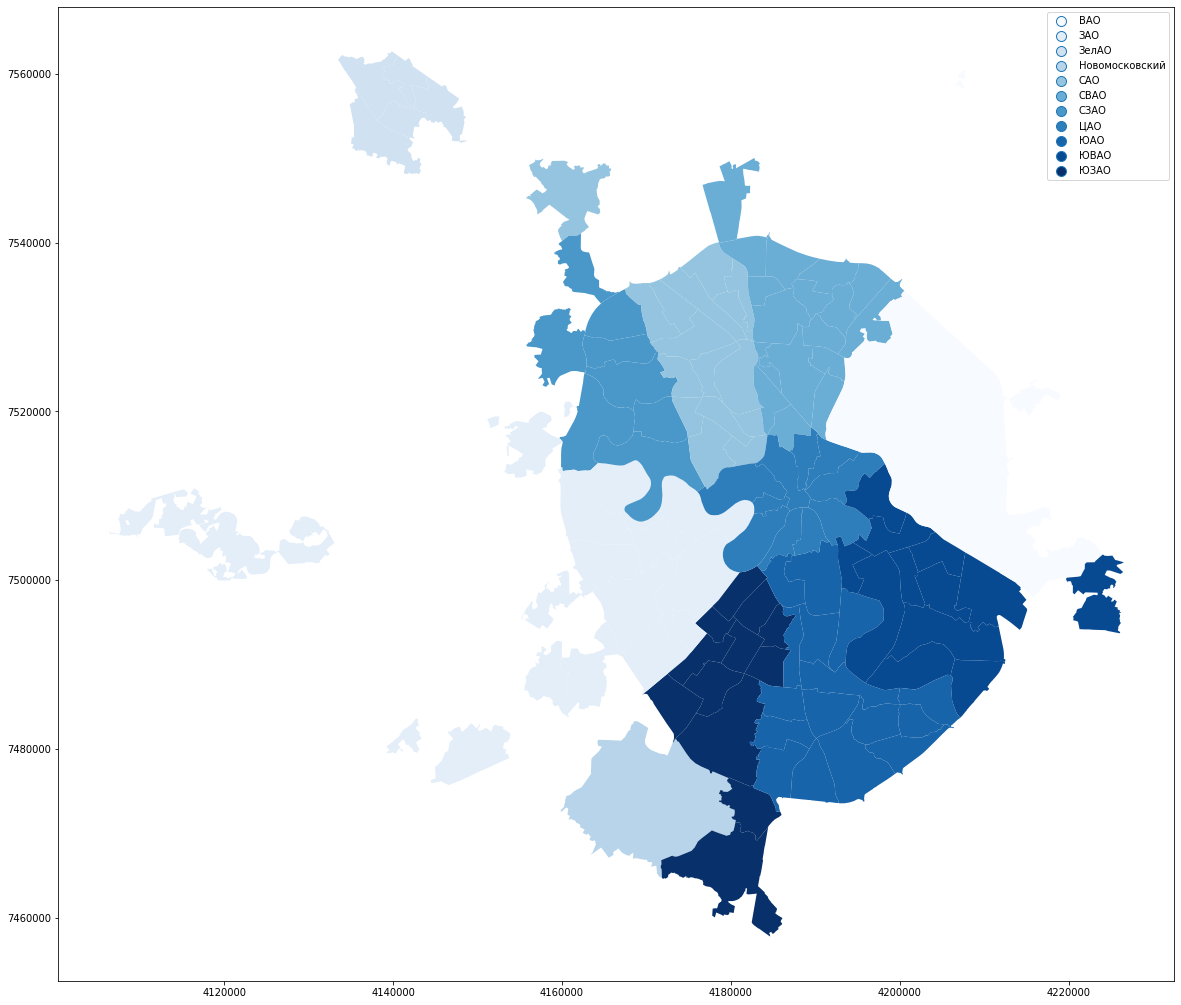

In [119]:
m_map_wm = m_map.to_crs({'init' :'epsg:3857'})
m_map_wm.plot(column = 'ABBREV_AO', linewidth=0.5, cmap='Blues', legend=True, figsize=[20,20], )

In [128]:
full_votes.reset_index()
m_map_wm.reset_index()

,index,NAME,OKATO,OKTMO,NAME_AO,OKATO_AO,ABBREV_AO,TYPE_MO,geometry
0,1,филевский парк,45268595,45328000,Западный,45268000,ЗАО,Муниципальный округ,"POLYGON ((4166426.928456915 7508453.649767973,..."
1,9,матушкино,45272562,45331000,Зеленоградский,45272000,ЗелАО,Муниципальный округ,"POLYGON ((4138694.961250751 7559998.797434154,..."
2,10,внуково,45268552,45317000,Западный,45268000,ЗАО,Муниципальный округ,(POLYGON ((4144447.663104272 7476303.888757412...
3,11,савелки,45272568,45377000,Зеленоградский,45272000,ЗелАО,Муниципальный округ,"POLYGON ((4142138.518378951 7558580.608673893,..."
4,13,силино,45272572,45332000,Зеленоградский,45272000,ЗелАО,Муниципальный округ,"POLYGON ((4133471.038110448 7561690.266458496,..."
...,...,...,...,...,...,...,...,...,...
121,141,ивановское,45263567,45306000,Восточный,45263000,ВАО,Муниципальный округ,"POLYGON ((4207855.47883105 7511245.019850533, ..."
122,142,косино-ухтомский,45263573,45308000,Восточный,45263000,ВАО,Муниципальный округ,"POLYGON ((4211886.914190128 7500855.879888061,..."
123,143,новокосино,45263579,45310000,Восточный,45263000,ВАО,Муниципальный округ,"POLYGON ((4212375.807129796 7504949.200692546,..."
124,144,некрасовка,45290574,45391000,Юго-Восточный,45290000,ЮВАО,Муниципальный округ,"POLYGON ((4219690.822376853 7500160.88690479, ..."


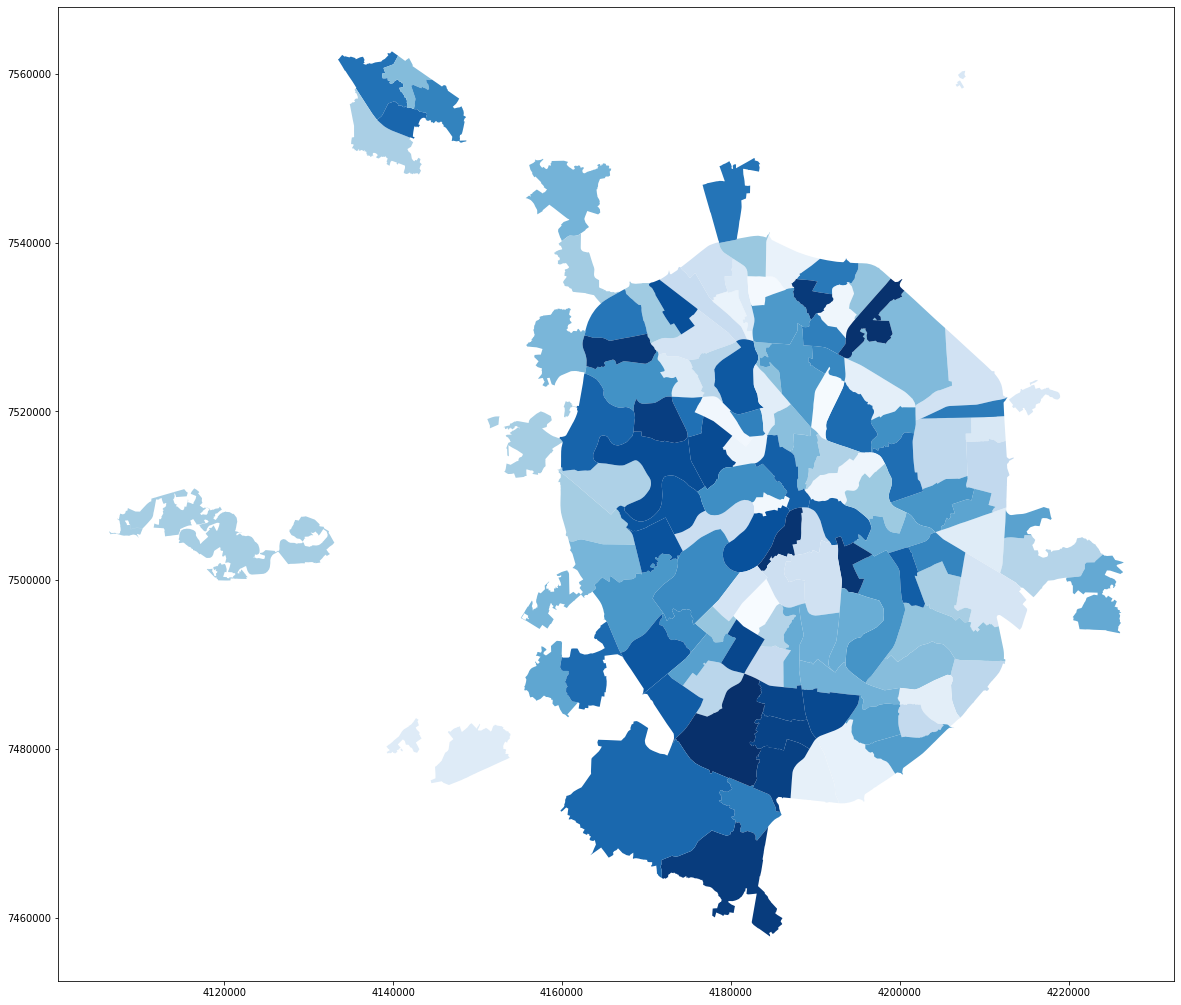

In [154]:
complete_map = pd.merge(left=full_votes, right=m_map_wm, left_on='District', right_on='NAME')
complete_map = gpd.GeoDataFrame(complete_map)
complete_map.plot(column = 'NAME', linewidth=1, cmap='Blues', legend=False, figsize=[20,20], )

In [165]:
people_showed = complete_map['Число действительных бюллетеней'] / complete_map['Число избирателей, внесенных в список'] * 100
complete_map['showed'] = people_showed

In [ ]:
winner = complete_map.iloc[:,5:10].idxmax(axis=1)
complete_map['Winner'] = winner

# Well the winner is boringly obvious

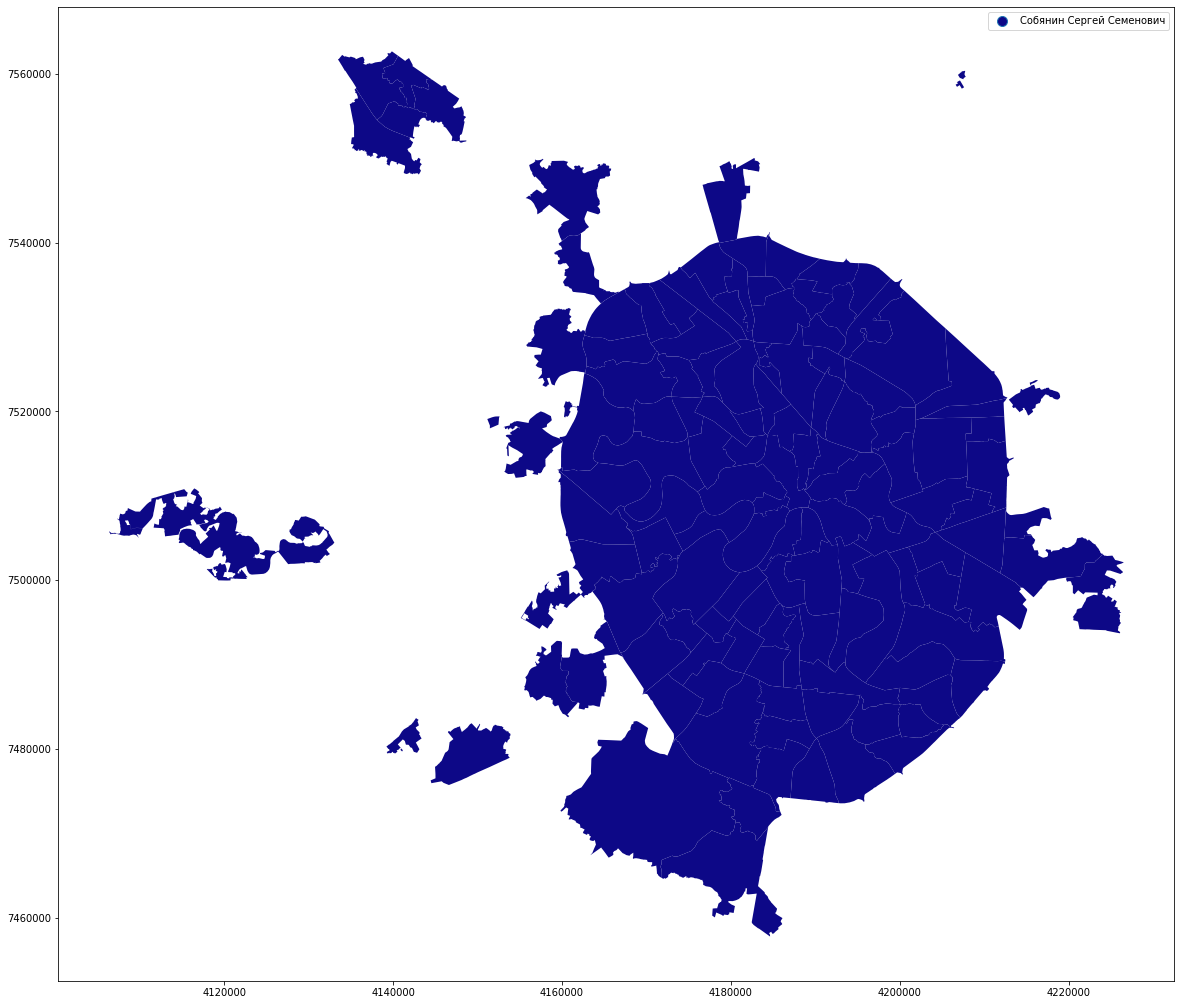

In [169]:
complete_map.plot(column = 'Winner', linewidth=1, cmap='plasma', legend=True, figsize=[20,20])

# Number of people who showed up
The are anomalies on the outskirts and two closer to the centre

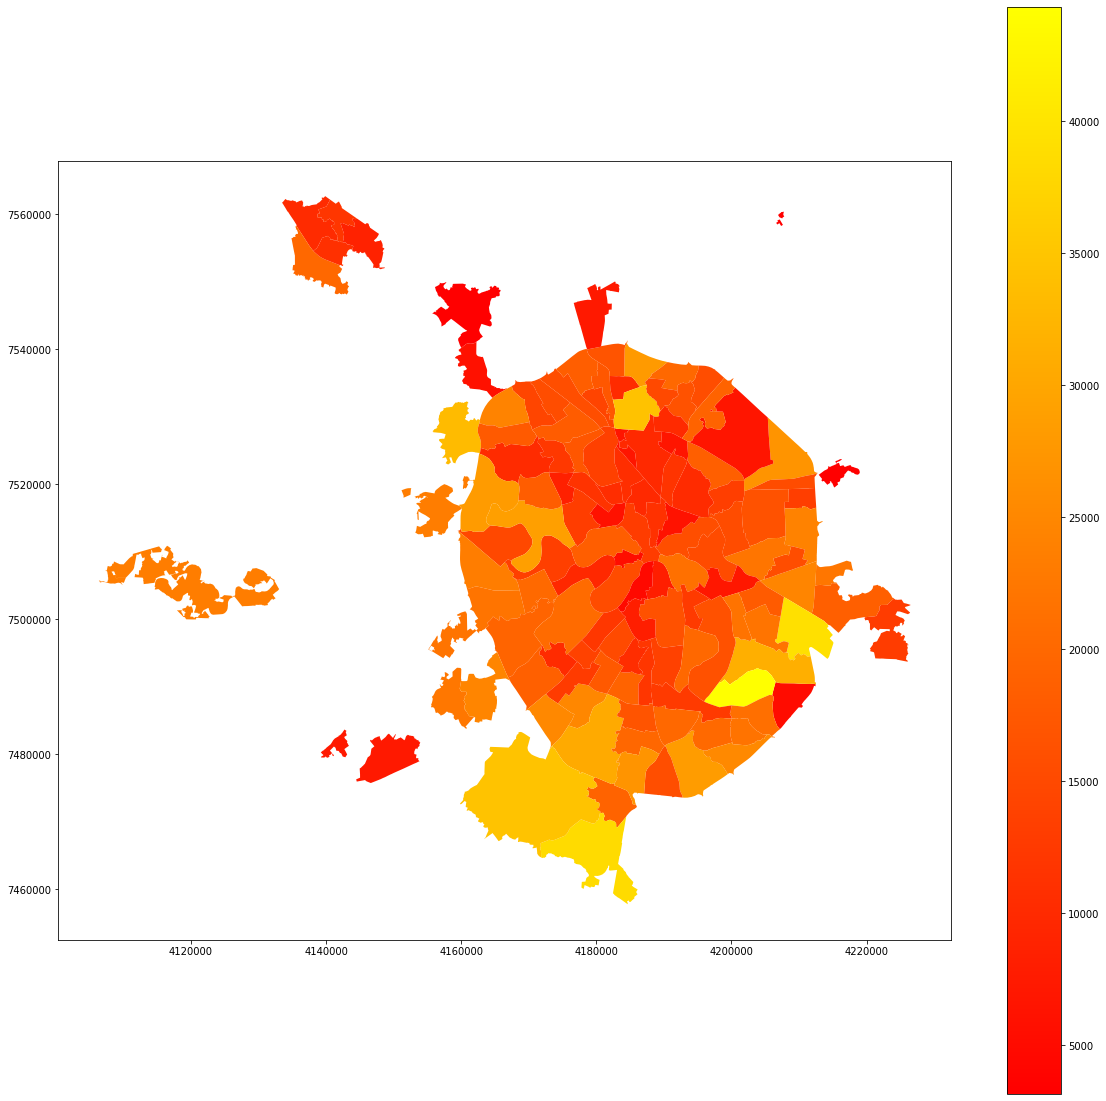

In [160]:
complete_map.plot(column = 'Число действительных бюллетеней', linewidth=1, cmap='autumn', legend=True, figsize=[20,20])

# Percentage of people who showed up

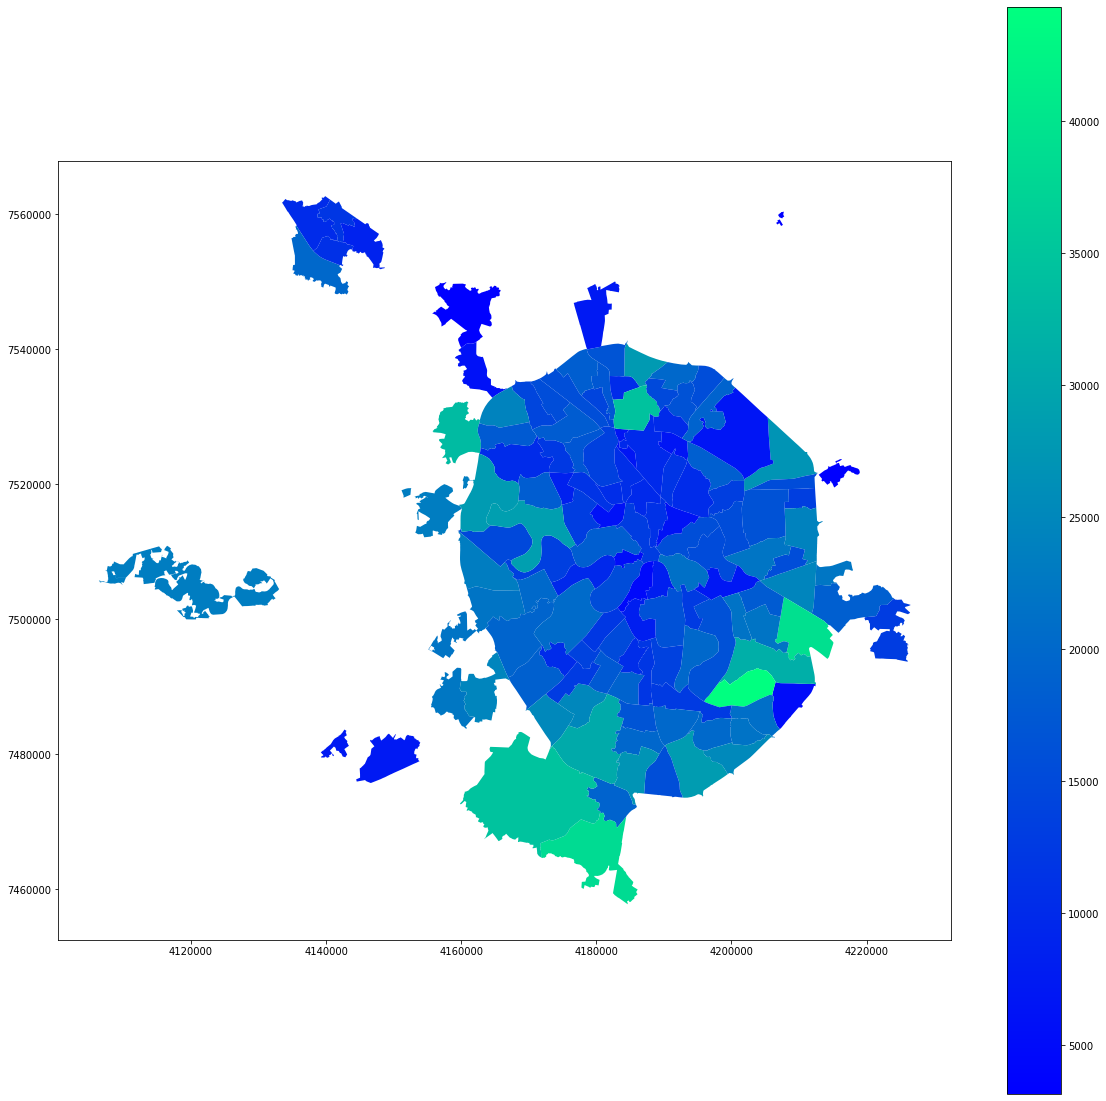

In [168]:
complete_map.plot(column = 'Число действительных бюллетеней', linewidth=1, cmap='winter', legend=True, figsize=[20,20])

# Anomaly found according to people showed up
The numbers of votes are not the biggest

In [183]:
showed_std = complete_map['showed'].std() * 3
showed_avrg = complete_map['showed'].mean()
for percent in complete_map['showed']:
    if math.fabs(percent - showed_avrg) > showed_std:
        print (complete_map.loc[complete_map[complete_map['showed'] == percent].index].NAME)

6    косино-ухтомский
Name: NAME, dtype: object
11    восточный
Name: NAME, dtype: object
31    старое крюково
Name: NAME, dtype: object
44    молжаниновский
Name: NAME, dtype: object


In [194]:
for an in [6, 11, 31, 44]:
    perc = complete_map.loc[an, 'Собянин Сергей Семенович'] / complete_map.loc[an, 'Число действительных бюллетеней'] * 100
    print ('Anomaly in ' + str(complete_map.loc[an, 'District']) + ' with perc ' + str(perc) + ' vote and ' + str(complete_map.loc[an, 'showed']) + ' appearance')

Anomaly in косино-ухтомский with perc 77.38649907899014 vote and 40.075556906509185 appearance
Anomaly in восточный with perc 68.63468634686348 vote and 40.60432013984268 appearance
Anomaly in старое крюково with perc 76.55691094194258 vote and 40.63431723315444 appearance
Anomaly in молжаниновский with perc 83.38607594936708 vote and 45.01424501424501 appearance


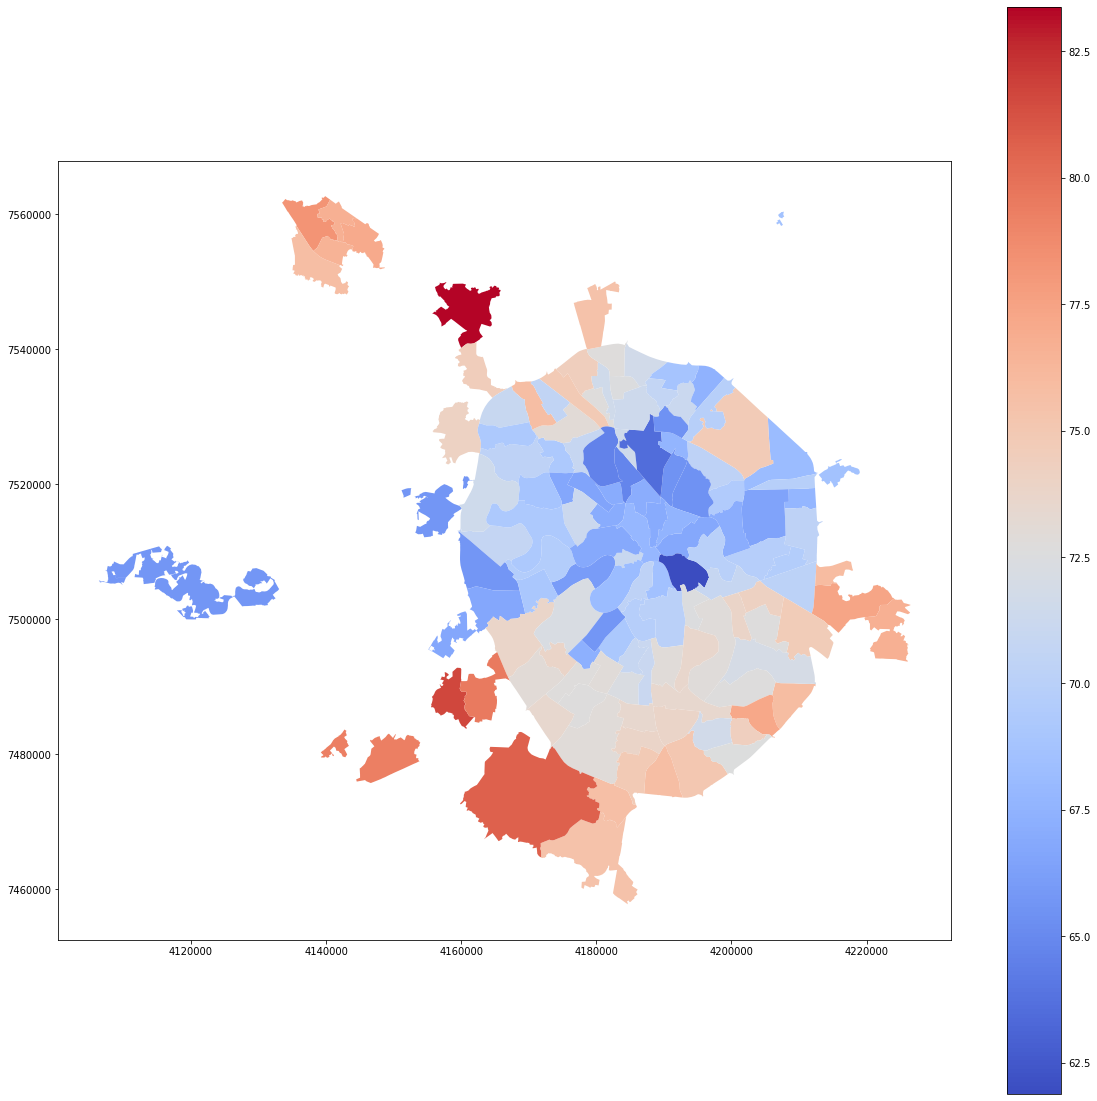

In [207]:
win_votes = complete_map['Собянин Сергей Семенович'] / complete_map['Число действительных бюллетеней'] * 100
complete_map['win_votes'] = win_votes
complete_map.plot(column='win_votes', linewidth=1, cmap='coolwarm', legend=True, figsize=[20,20])